In [29]:
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric, TotalSwaps
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [30]:
# N = 4
# coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)
coupling_map = CouplingMap.from_grid(6, 6)

In [31]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [32]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    # QiskitLevel3(coupling_map, cx_basis=True),
    # Mirage(coupling_map, cx_basis=True, parallel=0),
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, logger=transpile_benchy_logger),
]

In [33]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

INFO:transpile_benchy:Running benchmarks for circuits...
Circuits from library:   0%|          | 0/13 [00:00<?, ?it/s]

Loading qec9xz_n17 from QASMBench


INFO:transpile_benchy:Running benchmark for circuit qec9xz_n17
Circuits from library:   8%|▊         | 1/13 [04:00<48:02, 240.23s/it]INFO:transpile_benchy:Running benchmark for circuit seca_n11


Loading seca_n11 from QASMBench


Circuits from library:  15%|█▌        | 2/13 [08:26<46:50, 255.50s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  23%|██▎       | 3/13 [12:54<43:31, 261.14s/it]INFO:transpile_benchy:Running benchmark for circuit knn_n25


Loading knn_n25 from QASMBench


Circuits from library:  31%|███       | 4/13 [17:34<40:16, 268.49s/it]INFO:transpile_benchy:Running benchmark for circuit swap_test_n25


Loading swap_test_n25 from QASMBench


Circuits from library:  38%|███▊      | 5/13 [22:08<36:04, 270.56s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  46%|████▌     | 6/13 [27:10<32:50, 281.50s/it]INFO:transpile_benchy:Running benchmark for circuit multiplier_n15


Loading multiplier_n15 from QASMBench


Circuits from library:  54%|█████▍    | 7/13 [34:33<33:25, 334.18s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  62%|██████▏   | 8/13 [41:32<30:05, 361.01s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library:  69%|██████▉   | 9/13 [48:30<25:15, 378.91s/it]

Loading portfolioqaoa_n16 from MQTBench


INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16
Circuits from library:  77%|███████▋  | 10/13 [1:02:50<26:22, 527.51s/it]INFO:transpile_benchy:Running benchmark for circuit qftentangled_n16


Loading qftentangled_n16 from MQTBench


Circuits from library:  85%|████████▍ | 11/13 [1:10:15<16:44, 502.37s/it]INFO:transpile_benchy:Running benchmark for circuit qpeexact_n16


Loading qpeexact_n16 from MQTBench


Circuits from library:  92%|█████████▏| 12/13 [1:18:04<08:12, 492.08s/it]INFO:transpile_benchy:Running benchmark for circuit ae_n16


Loading ae_n16 from MQTBench


Circuits from library: 100%|██████████| 13/13 [1:26:21<00:00, 398.58s/it]


In [34]:
print(benchmark)


Transpiler: Mirage-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: ae_n16                                   Mean result: 0.933                          Trials: [1.0, 0.9327731092436975, 0.7899159663865546, 1.0, 0.9411764705882353]
  Circuit: bigadder_n18                             Mean result: 0.244                          Trials: [0.20353982300884957, 0.23893805309734514, 0.3274336283185841, 0.22123893805309736, 0.23008849557522124]
  Circuit: knn_n25                                  Mean result: 0.344                          Trials: [0.5352112676056338, 0.3380281690140845, 0.30985915492957744, 0.22535211267605634, 0.30985915492957744]
  Circuit: multiplier_n15                           Mean result: 0.397                          Trials: [0.38071065989847713, 0.45685279187817257, 0.41116751269035534, 0.36548223350253806, 0.37055837563451777]
  Circuit: portfolioqaoa_n16                        Mean result: 1.000                          Trials: [1.0, 1.0, 1.0, 1.0, 1.0]

In [35]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -29.58293759547691,
  'aggregrate_change': -32.08691273036692,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'swap_test_n25'},
 'monodromy_total': {'average_change': -10.253081206893013,
  'aggregrate_change': -12.342163085432158,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'qram_n20'},
 'total_swaps': {'average_change': -59.862211355192535,
  'aggregrate_change': -77.61235151089284,
  'best_circuit': 'seca_n11',
  'worst_circuit': 'qram_n20'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'qec9xz_n17',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 23912.23202600301,
  'aggregrate_change': 16339.791596060439,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'qec9xz_n17'}}

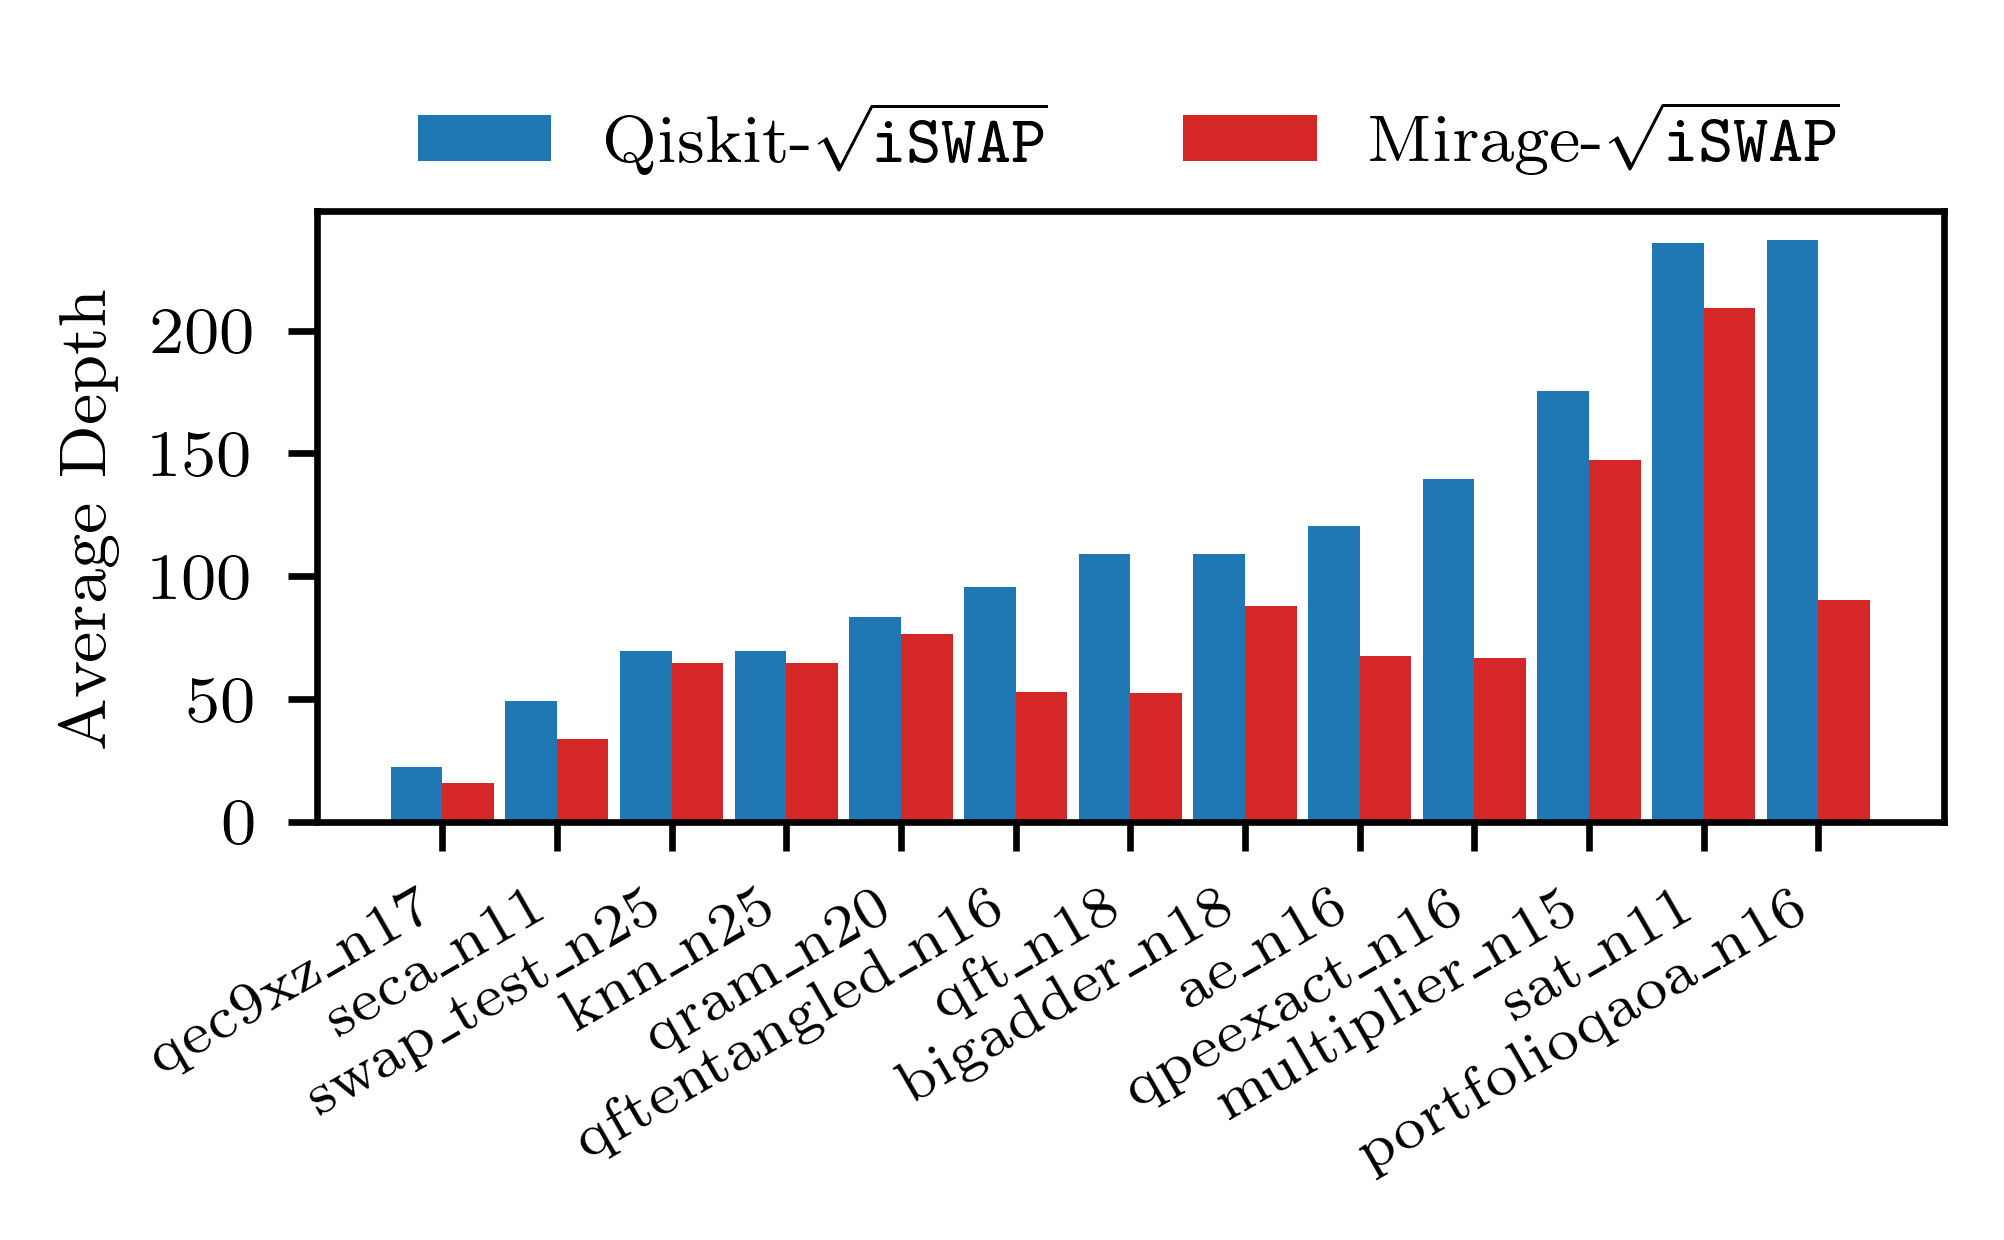

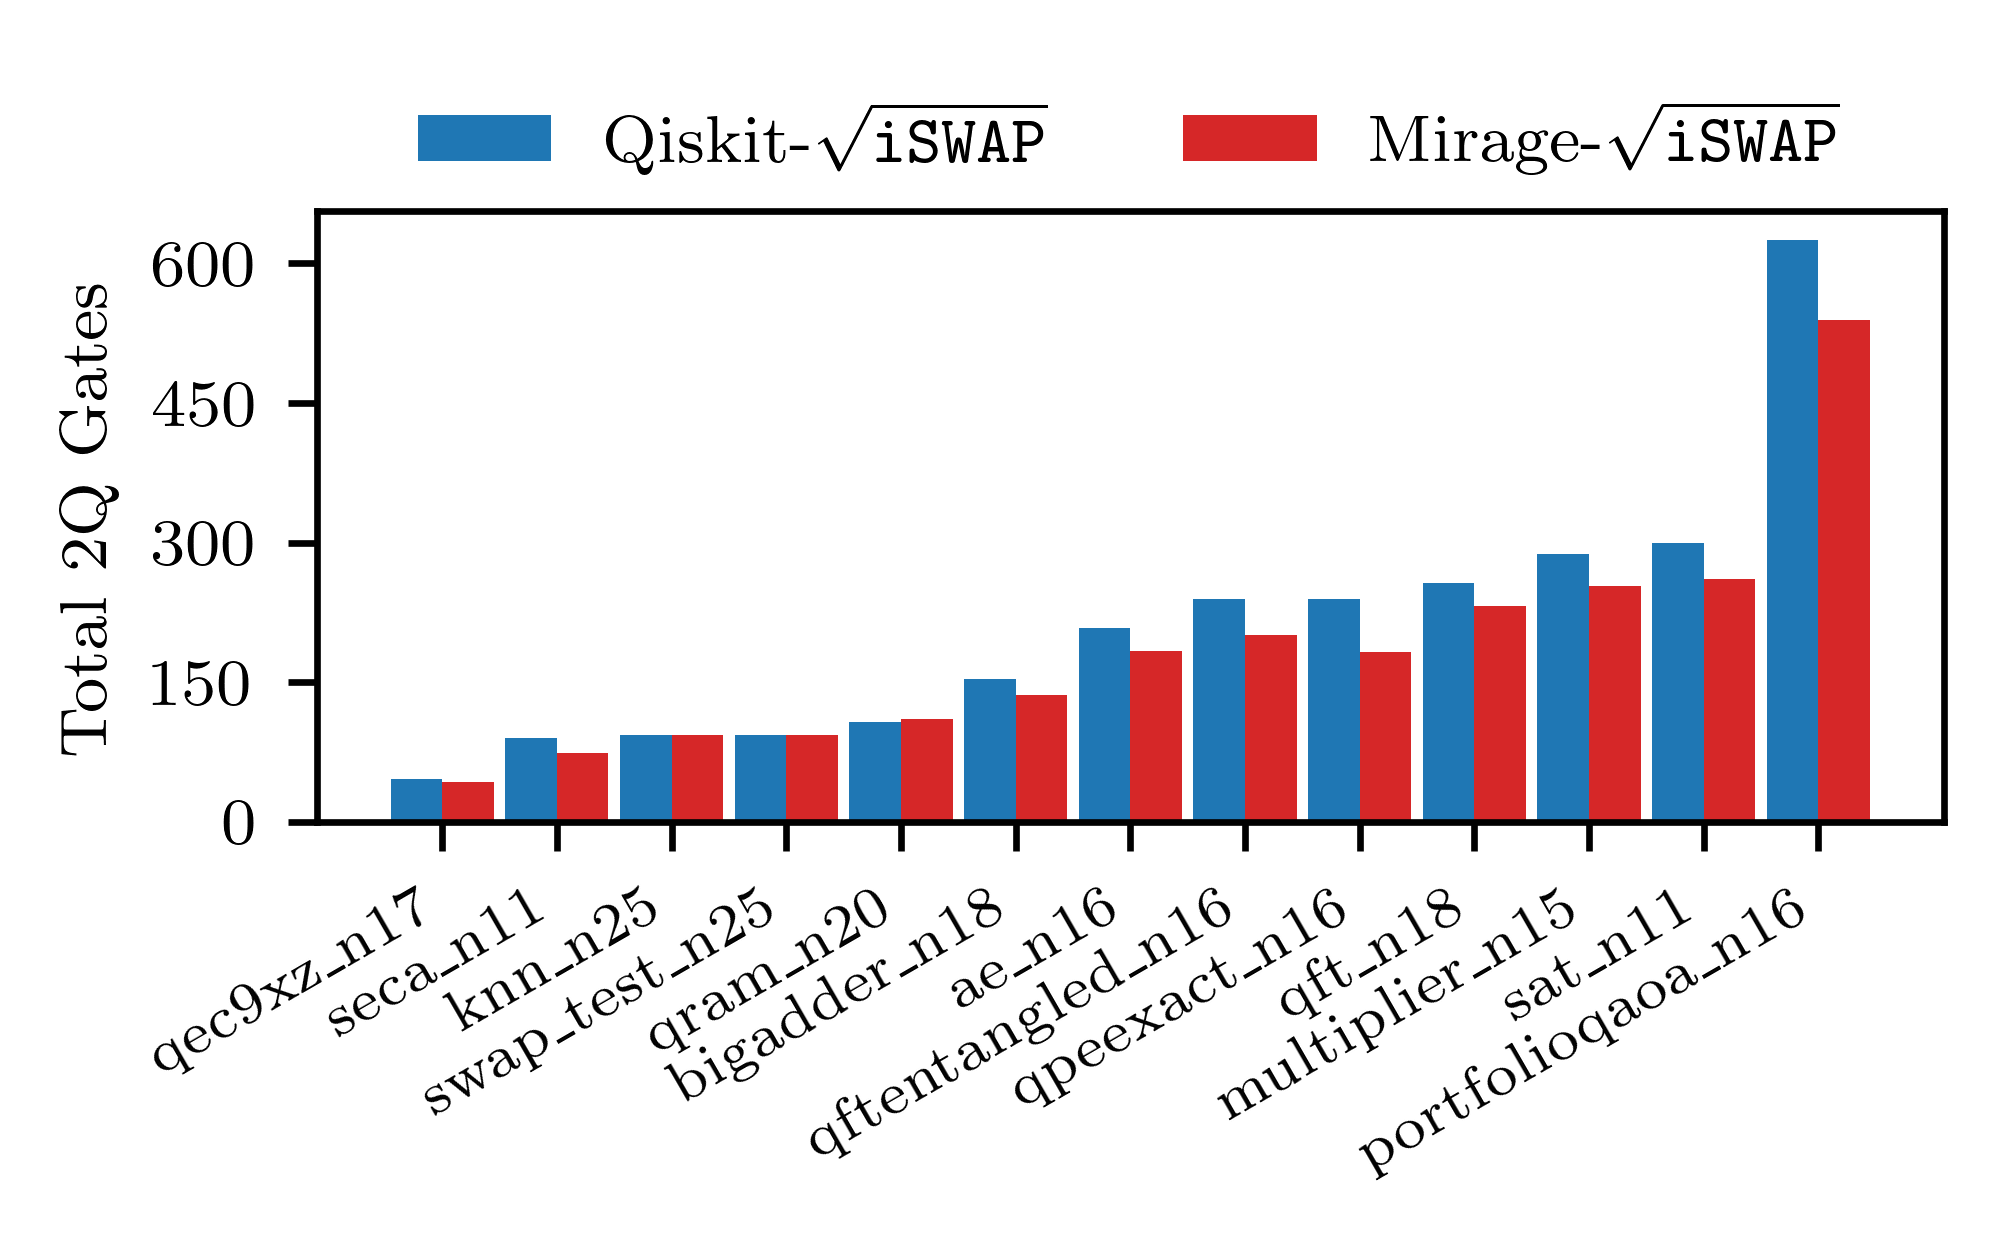

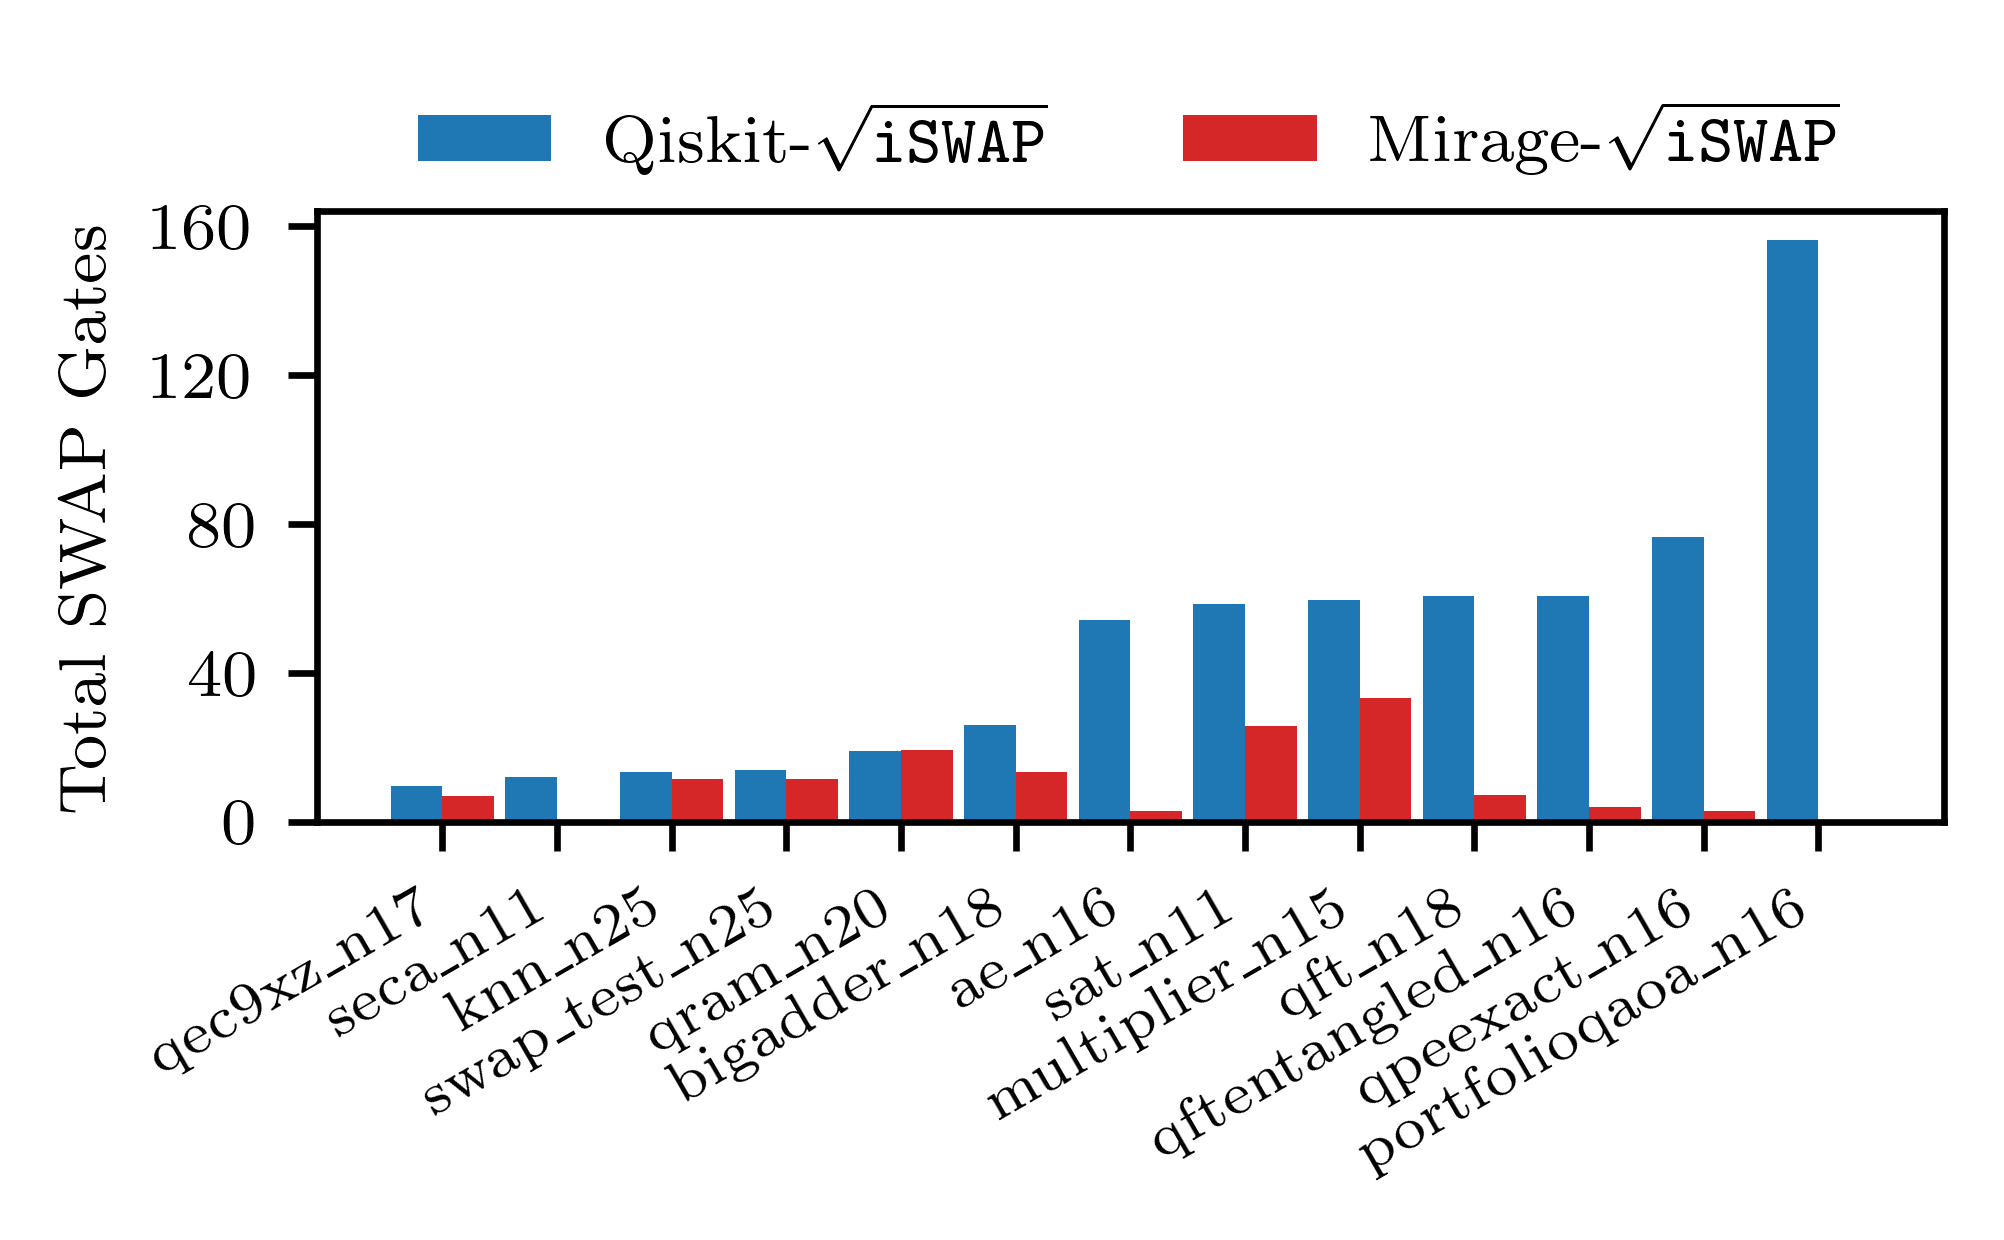

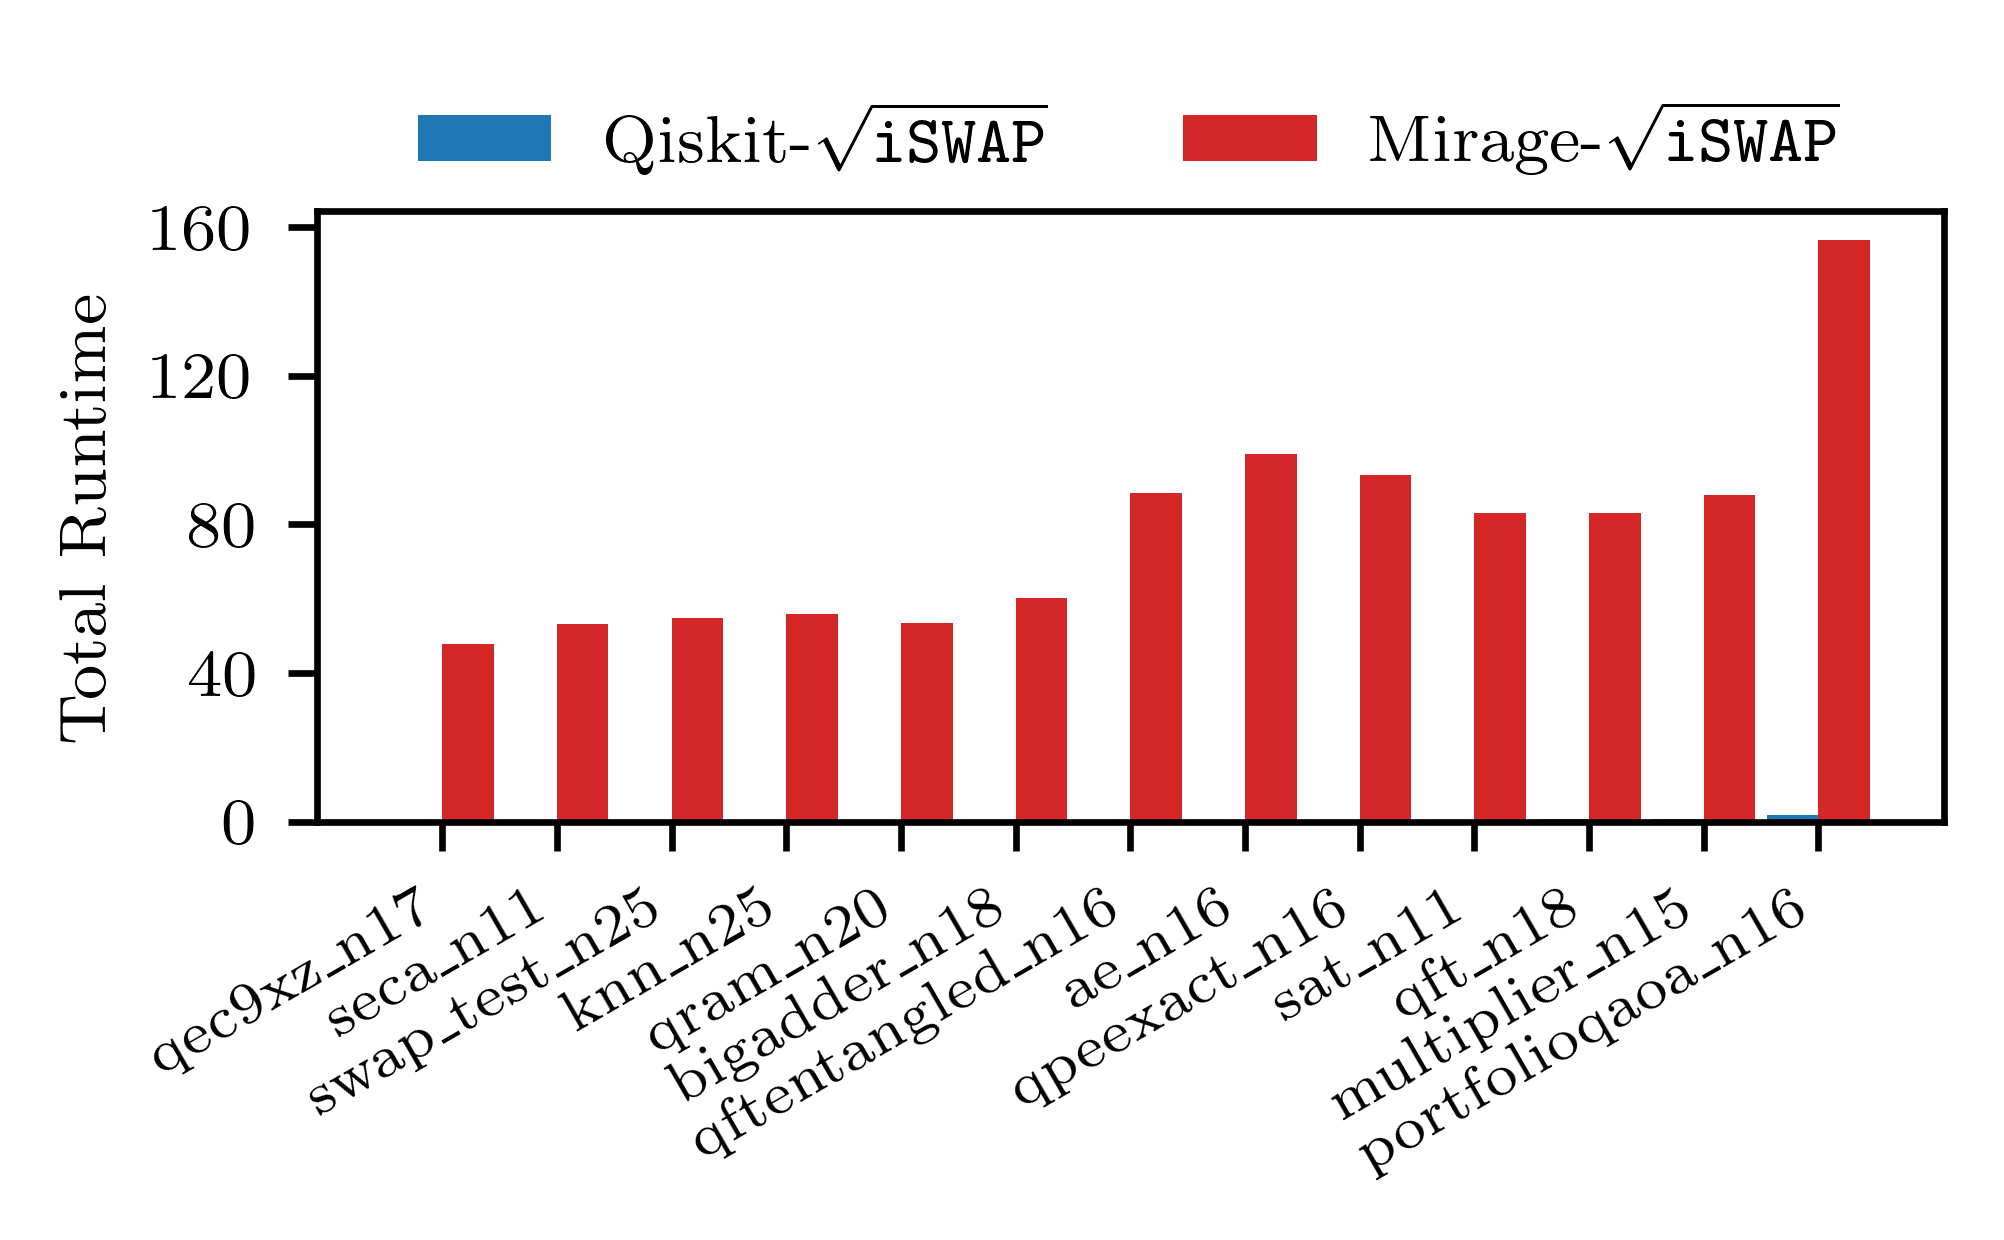

In [36]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=1, legend_show=1, filename="grid", color_override=[0, 3])